In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.extensions import RXGate, RYGate, RZGate

In [5]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

angulos = np.arange(0, 2 * np.pi, np.pi/2)
a = []
#for q in range(n):
#    a.append((n-q-1)*'0'+'1'+(q)*'0')
a.append('00')    
i = x = y = z = 0

for x in range(angulos.size):
    for y in range(angulos.size):
        for z in range(angulos.size):
            circ = QuantumCircuit(n,n)
            circ.append(J, range(n))
            for q in range(n):
                circ.append(RXGate(angulos[x]),[q])
                circ.append(RYGate(angulos[y]),[q])
                circ.append(RZGate(angulos[z]),[q])            
            circ.append(J_dg, range(n))
            circ.measure(range(n), range(n))

            backend = Aer.get_backend('qasm_simulator')
            job = execute(circ, backend=backend, shots=1000)
            result = job.result()
            measurement = result.get_counts(circ)
            i += 1
            print(i, "- ", end ="") 
    
            b = list(measurement.keys())

            if (a==b):                
                print("\nRe piola:", measurement)
                print(circ)

1 - 
Re piola: {'00': 1000}
     ┌──────────┐┌───────┐┌───────┐┌───────┐┌──────────┐┌─┐   
q_0: ┤0         ├┤ RX(0) ├┤ RY(0) ├┤ RZ(0) ├┤0         ├┤M├───
     │  unitary │├───────┤├───────┤├───────┤│  unitary │└╥┘┌─┐
q_1: ┤1         ├┤ RX(0) ├┤ RY(0) ├┤ RZ(0) ├┤1         ├─╫─┤M├
     └──────────┘└───────┘└───────┘└───────┘└──────────┘ ║ └╥┘
c: 2/════════════════════════════════════════════════════╩══╩═
                                                         0  1 
2 - 3 - 
Re piola: {'00': 1000}
     ┌──────────┐┌───────┐┌───────┐┌───────┐┌──────────┐┌─┐   
q_0: ┤0         ├┤ RX(0) ├┤ RY(0) ├┤ RZ(π) ├┤0         ├┤M├───
     │  unitary │├───────┤├───────┤├───────┤│  unitary │└╥┘┌─┐
q_1: ┤1         ├┤ RX(0) ├┤ RY(0) ├┤ RZ(π) ├┤1         ├─╫─┤M├
     └──────────┘└───────┘└───────┘└───────┘└──────────┘ ║ └╥┘
c: 2/════════════════════════════════════════════════════╩══╩═
                                                         0  1 
4 - 5 - 6 - 7 - 8 - 9 - 10 - 
Re piola: {'00': 1000}
     

In [15]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

dx = np.pi/2
dy = np.pi/4
dz = 0

circ = QuantumCircuit(n,n)
circ.append(J, range(n))
for q in range(n):
    circ.append(RXGate(dx),[q])
    circ.append(RYGate(dy),[q])
    circ.append(RZGate(dz),[q])            
circ.append(J_dg, range(n))
circ.measure(range(n), range(n))


backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1)
result = job.result()
measurement = result.get_counts(circ)

print(list(measurement.keys()))
#print(circ)
#plot_histogram(measurement)

['10']


{'0001': 258, '0010': 246, '0100': 241, '1000': 255}
     ┌──────────┐┌─────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐         
q_0: ┤0         ├┤ RX(π/2) ├┤ RY(3π/8) ├┤ RZ(3π/4) ├┤0         ├┤M├─────────
     │          │├─────────┤├──────────┤├──────────┤│          │└╥┘┌─┐      
q_1: ┤1         ├┤ RX(π/2) ├┤ RY(3π/8) ├┤ RZ(3π/4) ├┤1         ├─╫─┤M├──────
     │  unitary │├─────────┤├──────────┤├──────────┤│  unitary │ ║ └╥┘┌─┐   
q_2: ┤2         ├┤ RX(π/2) ├┤ RY(3π/8) ├┤ RZ(3π/4) ├┤2         ├─╫──╫─┤M├───
     │          │├─────────┤├──────────┤├──────────┤│          │ ║  ║ └╥┘┌─┐
q_3: ┤3         ├┤ RX(π/2) ├┤ RY(3π/8) ├┤ RZ(3π/4) ├┤3         ├─╫──╫──╫─┤M├
     └──────────┘└─────────┘└──────────┘└──────────┘└──────────┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                 0  1  2  3 


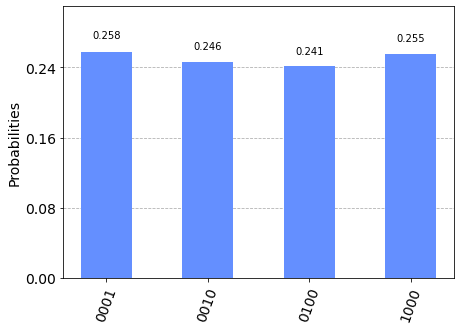

In [4]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 4
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

dx = np.pi/2
dy = 3*np.pi/8
dz = 3*np.pi/4

circ = QuantumCircuit(n,n)
circ.append(J, range(n))
for q in range(n):
    circ.append(RXGate(dx),[q])
    circ.append(RYGate(dy),[q])
    circ.append(RZGate(dz),[q])            
circ.append(J_dg, range(n))
circ.measure(range(n), range(n))


backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1000)
result = job.result()
measurement = result.get_counts(circ)

print(measurement)
print(circ)
plot_histogram(measurement)

     ┌──────────┐┌───┐
q_0: ┤0         ├┤ X ├
     │  unitary │└───┘
q_1: ┤1         ├─────
     └──────────┘     
c: 2/═════════════════
                      
[0.        +0.j         0.70710678+0.j         0.        +0.70710678j
 0.        +0.j        ]


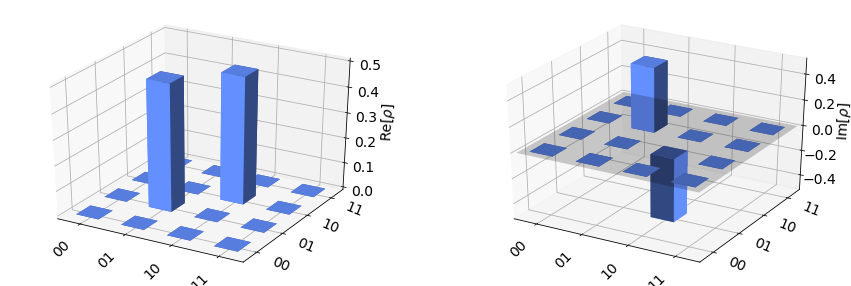

In [7]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

circ = QuantumCircuit(n,n)
circ.append(J, range(n))
circ.x(0)
#circ.x(1)
#circ.append(J_dg, range(n))
#circ.measure(range(n), range(n))

print(circ)

#backend = Aer.get_backend('qasm_simulator')
#job = execute(circ, backend=backend, shots=1000)
#result = job.result()
#measurement = result.get_counts(circ)
#print(measurement)
#plot_histogram(measurement)

backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
statevector = result.get_statevector(circ)
print(statevector)
plot_state_city(statevector)

# $\psi_{out} = \frac{|00\rangle - j |01\rangle - j |10\rangle + |11\rangle}{2}$

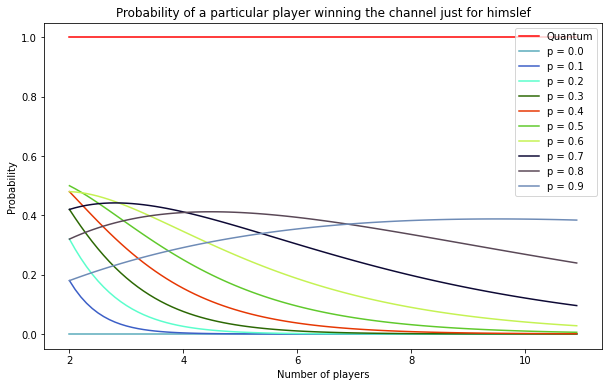

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(2, 11, 0.1)
f0 = 1 / x

f = []

plt.figure(figsize=(10, 6))
plt.plot(x, x * f0,'red', label = 'Quantum')
for p in np.arange(0,1,0.1):
    f.append(x * np.power(p, x-1) * (1 - p)) # * ((np.power(2,x))/(np.power(2,x) - 1)))
    colors = '#{:0>6}'.format(np.base_repr(np.random.choice(16777215), base=16))
    plt.plot(x, f[-1],'red', color = colors, label = 'p = {}'.format(np.round(p,2)))
    
plt.xlabel("Number of players")
plt.ylabel("Probability")
plt.legend()
plt.title("Probability of a particular player winning the channel just for himslef")
plt.show()

In [3]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

angulos = np.arange(0, 2 * np.pi, np.pi/(2*n))
a = []

#for q in range(n):
#    a.append((n-q-1)*'0'+'1'+(q)*'0')

a.append('01')
print(a)
i = x = y = z = 0

dx1 = np.pi/2
dy1 = np.pi/4
dz1 = 0

for x in range(angulos.size):
    for y in range(angulos.size):
        for z in range(angulos.size):
            circ = QuantumCircuit(n,n)
            circ.append(J, range(n))
            circ.append(RXGate(angulos[x]),[0])
            circ.append(RYGate(angulos[y]),[0])
            circ.append(RZGate(angulos[z]),[0])    
            circ.append(RXGate(dx1),[1])
            circ.append(RYGate(dy1),[1])
            circ.append(RZGate(dz1),[1])             
            circ.append(J_dg, range(n))
            circ.measure(range(n), range(n))

            backend = Aer.get_backend('qasm_simulator')
            job = execute(circ, backend=backend, shots=1000)
            result = job.result()
            measurement = result.get_counts(circ)
            i += 1
            print(i, "- ", end ="") 
    
            b = list(measurement.keys())

            if (a==b):                
                print("\nRe piola:", measurement)
                print(circ)

['01']
1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 
Re piola: {'01': 1000}
     ┌──────────┐┌─────────┐┌─────────┐┌──────────┐┌──────────┐┌─┐   
q_0: ┤0         ├┤ RX(π/2) ├┤ RY(π/4) ├┤ RZ(3π/2) ├┤0         ├┤M├───
     │  unitary │├─────────┤├─────────┤└┬───────┬─┘│  unitary │└╥┘┌─┐
q_1: ┤1  

In [21]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

dx0 = np.pi/2
dy0 = np.pi/4
dz0 = 0

dx1 = np.pi/2
dy1 = np.pi/4
dz1 = 3*np.pi/2

circ = QuantumCircuit(n,n)
circ.append(J, range(n))
circ.append(RXGate(dx0),[0])
circ.append(RYGate(dy0),[0])
circ.append(RZGate(dz0),[0])    
circ.append(RXGate(dx1),[1])
circ.append(RYGate(dy1),[1])
circ.append(RZGate(dz1),[1])    

circ.append(J_dg, range(n))
circ.measure(range(n), range(n))


backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1)
result = job.result()
measurement = result.get_counts(circ)

print(list(measurement.keys()))

['10']


In [23]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

angulos = np.arange(0, 2 * np.pi, np.pi/(2*n))
a = []

#for q in range(n):
#    a.append((n-q-1)*'0'+'1'+(q)*'0')

a.append('01')
print(a)
i = x = y = z = 0

dx1 = np.pi/2
dy1 = np.pi/4
dz1 = 3*np.pi/2

for x in range(angulos.size):
    for y in range(angulos.size):
        for z in range(angulos.size):
            circ = QuantumCircuit(n,n)
            circ.append(J, range(n))
            circ.append(RXGate(angulos[x]),[0])
            circ.append(RYGate(angulos[y]),[0])
            circ.append(RZGate(angulos[z]),[0])    
            circ.append(RXGate(dx1),[1])
            circ.append(RYGate(dy1),[1])
            circ.append(RZGate(dz1),[1])             
            circ.append(J_dg, range(n))
            circ.measure(range(n), range(n))

            backend = Aer.get_backend('qasm_simulator')
            job = execute(circ, backend=backend, shots=1000)
            result = job.result()
            measurement = result.get_counts(circ)
            i += 1
            print(i, "- ", end ="") 
    
            b = list(measurement.keys())

            if (a==b):                
                print("\nRe piola:", measurement)
                print(circ)

['01']
1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 
Re piola: {'01': 1000}
     ┌──────────┐┌─────────┐┌─────────┐ ┌───────┐  ┌──────────┐┌─┐   
q_0: ┤0         ├┤ RX(π/2) ├┤ RY(π/4) ├─┤ RZ(π) ├──┤0         ├┤M├───
     │  unitary │├─────────┤├─────────┤┌┴───────┴─┐│  unitary │└╥┘┌─┐
q_1: ┤1         ├┤ RX

In [25]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

dx0 = np.pi/2
dy0 = np.pi/4
dz0 = np.pi

dx1 = np.pi/2
dy1 = np.pi/4
dz1 = 3*np.pi/2

circ = QuantumCircuit(n,n)
circ.append(J, range(n))
circ.append(RXGate(dx0),[0])
circ.append(RYGate(dy0),[0])
circ.append(RZGate(dz0),[0])    
circ.append(RXGate(dx1),[1])
circ.append(RYGate(dy1),[1])
circ.append(RZGate(dz1),[1])    

circ.append(J_dg, range(n))
circ.measure(range(n), range(n))


backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1)
result = job.result()
measurement = result.get_counts(circ)

print(list(measurement.keys()))

['01']


In [26]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

angulos = np.arange(0, 2 * np.pi, np.pi/(2*n))
a = []

#for q in range(n):
#    a.append((n-q-1)*'0'+'1'+(q)*'0')

a.append('10')
print(a)
i = x = y = z = 0

dx0 = np.pi/2
dy0 = np.pi/4
dz0 = np.pi

for x in range(angulos.size):
    for y in range(angulos.size):
        for z in range(angulos.size):
            circ = QuantumCircuit(n,n)
            circ.append(J, range(n))
            circ.append(RXGate(dx0),[0])
            circ.append(RYGate(dy0),[0])
            circ.append(RZGate(dz0),[0])    
            circ.append(RXGate(angulos[x]),[1])
            circ.append(RYGate(angulos[y]),[1])
            circ.append(RZGate(angulos[z]),[1])              
            circ.append(J_dg, range(n))
            circ.measure(range(n), range(n))

            backend = Aer.get_backend('qasm_simulator')
            job = execute(circ, backend=backend, shots=1000)
            result = job.result()
            measurement = result.get_counts(circ)
            i += 1
            print(i, "- ", end ="") 
    
            b = list(measurement.keys())

            if (a==b):                
                print("\nRe piola:", measurement)
                print(circ)

['10']
1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 
Re piola: {'10': 1000}
     ┌──────────┐┌─────────┐┌─────────┐ ┌───────┐ ┌──────────┐┌─┐   
q_0: ┤0         ├┤ RX(π/2) ├┤ RY(π/4) ├─┤ RZ(π) ├─┤0         ├┤M├───
     │  unitary │├─────────┤├─────────┤┌┴───────┴┐│  unitary │└╥┘┌─┐
q_1: ┤1         ├┤ RX(π/2) ├┤ RY(π/4

In [28]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

dx0 = np.pi/2
dy0 = np.pi/4
dz0 = np.pi

dx1 = np.pi/2
dy1 = np.pi/4
dz1 = np.pi/2

circ = QuantumCircuit(n,n)
circ.append(J, range(n))
circ.append(RXGate(dx0),[0])
circ.append(RYGate(dy0),[0])
circ.append(RZGate(dz0),[0])    
circ.append(RXGate(dx1),[1])
circ.append(RYGate(dy1),[1])
circ.append(RZGate(dz1),[1])    

circ.append(J_dg, range(n))
circ.measure(range(n), range(n))


backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1)
result = job.result()
measurement = result.get_counts(circ)

print(list(measurement.keys()))

['10']


In [29]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

angulos = np.arange(0, 2 * np.pi, np.pi/(2*n))
a = []

#for q in range(n):
#    a.append((n-q-1)*'0'+'1'+(q)*'0')

a.append('01')
print(a)
i = x = y = z = 0

dx1 = np.pi/2
dy1 = np.pi/4
dz1 = np.pi/2

for x in range(angulos.size):
    for y in range(angulos.size):
        for z in range(angulos.size):
            circ = QuantumCircuit(n,n)
            circ.append(J, range(n))
            circ.append(RXGate(angulos[x]),[0])
            circ.append(RYGate(angulos[y]),[0])
            circ.append(RZGate(angulos[z]),[0])    
            circ.append(RXGate(dx1),[1])
            circ.append(RYGate(dy1),[1])
            circ.append(RZGate(dz1),[1])             
            circ.append(J_dg, range(n))
            circ.measure(range(n), range(n))

            backend = Aer.get_backend('qasm_simulator')
            job = execute(circ, backend=backend, shots=1000)
            result = job.result()
            measurement = result.get_counts(circ)
            i += 1
            print(i, "- ", end ="") 
    
            b = list(measurement.keys())

            if (a==b):                
                print("\nRe piola:", measurement)
                print(circ)

['01']
1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 
Re piola: {'01': 1000}
     ┌──────────┐┌─────────┐┌─────────┐ ┌───────┐ ┌──────────┐┌─┐   
q_0: ┤0         ├┤ RX(π/2) ├┤ RY(π/4) ├─┤ RZ(0) ├─┤0         ├┤M├───
     │  unitary │├─────────┤├─────────┤┌┴───────┴┐│  unitary │└╥┘┌─┐
q_1: ┤1         ├┤ RX(π/2) ├┤ RY(π/4) ├┤ RZ(π/2)

In [19]:
I_f = I = np.array([[1, 0],
              [0, 1]])
X_f = X = np.array([[0, 1],
              [1, 0]])

n = 2
for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)

J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()

dx0 = np.pi/2
dy0 = np.pi/4
dz0 = 0

dx1 = np.pi/2
dy1 = np.pi/4
dz1 = 3*np.pi/2

circ = QuantumCircuit(n,n)
circ.append(J, range(n))
circ.append(RXGate(dx0),[0])
circ.append(RYGate(dy0),[0])
circ.append(RZGate(dz0),[0])    
circ.append(RXGate(dx1),[1])
circ.append(RYGate(dy1),[1])
circ.append(RZGate(dz1),[1])    

circ.append(J_dg, range(n))
circ.measure(range(n), range(n))


backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1000)
result = job.result()
measurement = result.get_counts(circ)

print(measurement)

{'10': 1000}


In [9]:
p1 = []
probas = np.arange(0,1,0.1)                                                                     # probabilidades de ceder
for _p in probas:
    p1.append([_p])

devices = ["ibmq_16_melbourne", "ibmq_athens", "ibmq_manila", "ibmq_santiago"]
for c in devices:
    p1.append([np.pi/2, np.pi/4, 0, c]) # IBM devices

for c in np.arange(0,1.1,0.1):
    p1.append([np.pi/2, np.pi/4, 0, c]) # Decoherencia de werner
    
print(type(p1[10][3]))

<class 'str'>
